**Predicting the stock price of State Bank of India using Time Series Analysis taking data of the past 10 years**


In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
 #Fetch historical stock data of SBI of past 10 years
start_date='2013-01-01'
end_date='2024-06-10'

df = yf.download('SBIN.NS', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
#Shows the top most values of the table
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,240.490005,243.404999,239.755005,242.645004,213.236496,17202300
2013-01-02,245.000000,246.399994,243.815002,245.054993,215.354385,14660120
2013-01-03,246.000000,248.240005,243.619995,247.160004,217.204315,20103090
2013-01-04,246.000000,249.294998,245.065002,248.669998,218.531250,13705950
2013-01-07,249.000000,249.899994,246.175003,246.759995,216.852753,10264490


In [4]:
#Fetches the bottom values of the table
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,863.549988,912.000000,856.750000,905.650024,905.650024,64269020
2024-06-04,897.000000,897.000000,731.950012,775.200012,775.200012,122381193
2024-06-05,790.750000,795.000000,744.049988,789.750000,789.750000,74256082
2024-06-06,800.000000,833.349976,796.000000,816.950012,816.950012,40555649
2024-06-07,819.900024,831.500000,810.500000,829.950012,829.950012,25061284


In [5]:
#Shows the dimension of the table
df.shape

(2819, 6)

In [6]:
#Gives a view of how the database looks
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,240.490005,243.404999,239.755005,242.645004,213.236496,17202300
2013-01-02,245.000000,246.399994,243.815002,245.054993,215.354385,14660120
2013-01-03,246.000000,248.240005,243.619995,247.160004,217.204315,20103090
2013-01-04,246.000000,249.294998,245.065002,248.669998,218.531250,13705950
2013-01-07,249.000000,249.899994,246.175003,246.759995,216.852753,10264490
...,...,...,...,...,...,...
2024-06-03,863.549988,912.000000,856.750000,905.650024,905.650024,64269020
2024-06-04,897.000000,897.000000,731.950012,775.200012,775.200012,122381193
2024-06-05,790.750000,795.000000,744.049988,789.750000,789.750000,74256082


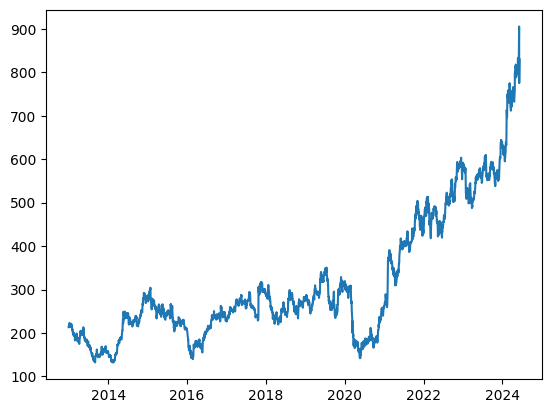

In [7]:
#Plot a line graph of adjusted closing prices over time using the DataFrame's
#index as the x-axis and the 'Adj Close' column as the y-axis.
plt.plot(df.index.to_numpy(),df['Adj Close'].to_numpy())
plt.show()

In [8]:
#Specifying the training data which is 90% of the total data
to_row=int(0.8*len(df))
training=list(df[:to_row]['Adj Close'])
testing=list(df[to_row:]['Adj Close'])


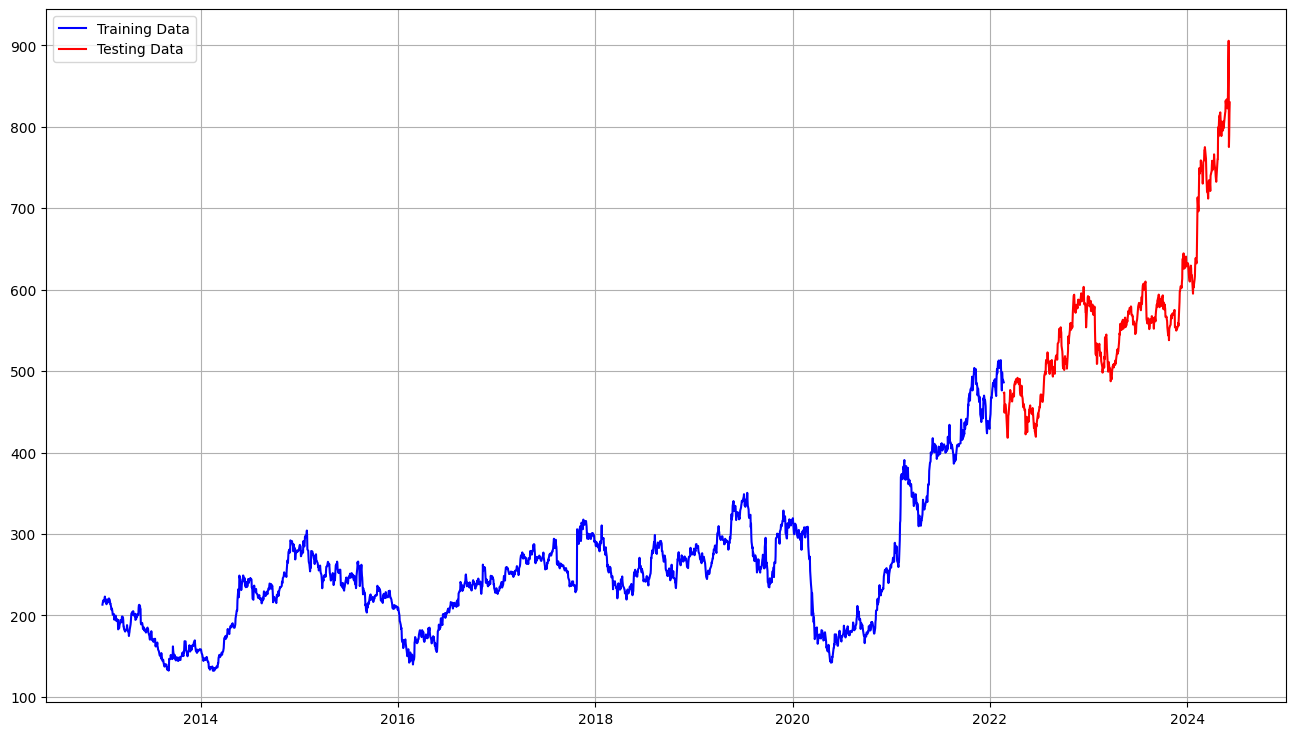

In [9]:
#Plotting the data highlighting the training and test data
plt.figure(figsize=(16,9))
plt.grid('True')
plt.plot(df[:to_row]['Adj Close'],'blue',label='Training Data')
plt.plot(df[to_row:]['Adj Close'],'red',label='Testing Data')
plt.legend()
plt.show()

In [10]:
# Using ADF Fuller test, we will be testing whether data is data is stationary or non-stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [11]:
#Performing adf test on the adjusted close price of the data
adf_test(df['Adj Close'])

ADF Statistics: 1.576166850912968
p- value: 0.9977842832772403
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [13]:
## Use Techniques Differencing
df['Close First Difference']=df['Adj Close']-df['Adj Close'].shift(1)


In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Close First Difference
Date,,,,,,,
2013-01-01,240.490005,243.404999,239.755005,242.645004,213.236496,17202300,NaN
2013-01-02,245.000000,246.399994,243.815002,245.054993,215.354385,14660120,2.117889
2013-01-03,246.000000,248.240005,243.619995,247.160004,217.204315,20103090,1.849930
2013-01-04,246.000000,249.294998,245.065002,248.669998,218.531250,13705950,1.326935
2013-01-07,249.000000,249.899994,246.175003,246.759995,216.852753,10264490,-1.678497


In [15]:
df=df.drop(['Open','High','Low','Close','Volume'],axis=1)
df.head()

,Adj Close,Close First Difference
Date,,
2013-01-01,213.236496,NaN
2013-01-02,215.354385,2.117889
2013-01-03,217.204315,1.849930
2013-01-04,218.531250,1.326935
2013-01-07,216.852753,-1.678497


In [16]:
df['Close First Difference'].fillna(0,inplace=True)
adf_test(df['Close First Difference'])

ADF Statistics: -11.483747296501912
p- value: 4.922625709273964e-21
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


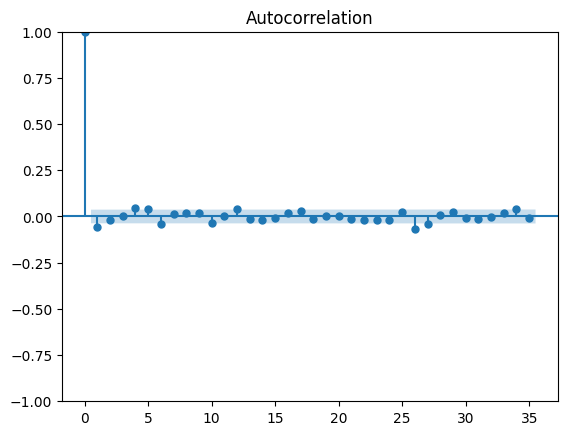

In [17]:
#We plot this to find the value of q in ARIMA (moving average)
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df['Close First Difference'].dropna())

<Figure size 2000x1000 with 0 Axes>

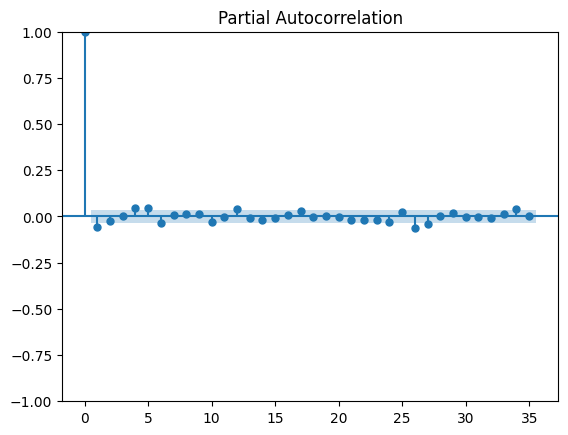

In [18]:
#We plot this to find the value of q in ARIMA (Autoregressive)
plt.figure(figsize=(20,10))
pacf = plot_pacf(df['Close First Difference'].dropna())

In [20]:
#Specifying the column Close First difference for further analysis
to_row=int(0.8*len(df))
training_s=df[:to_row]['Close First Difference']
testing_s=df[to_row:]['Close First Difference']
training_s.head()


,Close First Difference
Date,
2013-01-01,0.000000
2013-01-02,2.117889
2013-01-03,1.849930
2013-01-04,1.326935
2013-01-07,-1.678497


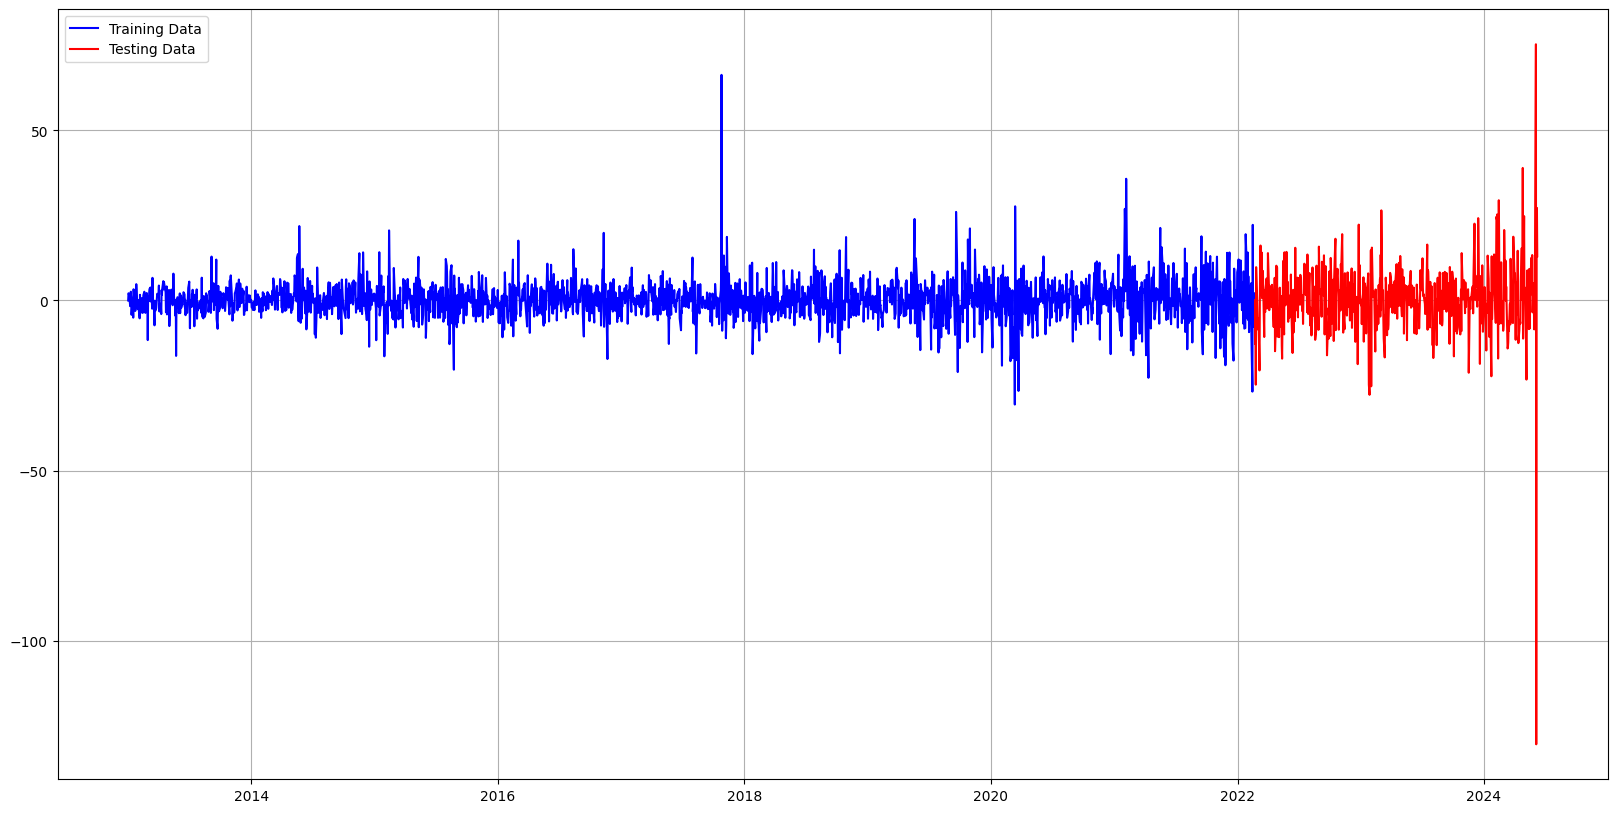

In [21]:
plt.figure(figsize=(20,10))
plt.grid('True')
plt.plot(training_s,'blue',label='Training Data')
plt.plot(testing_s,'red',label='Testing Data')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

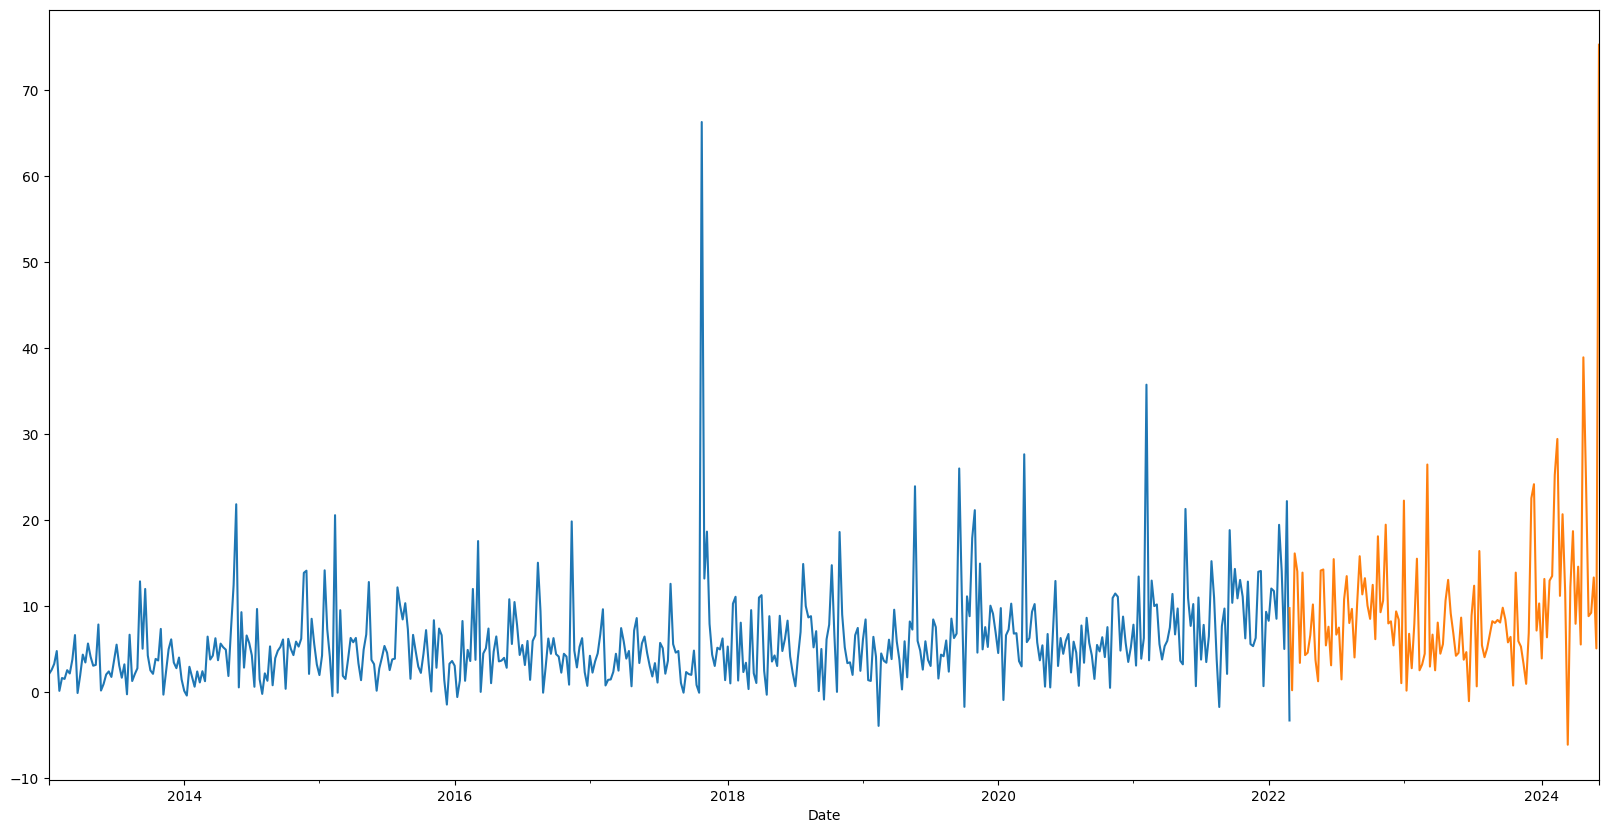

In [22]:
plt.figure(figsize=(20,10))
training_s.resample(rule='W').max().plot()
testing_s.resample(rule='W').max().plot()

In [23]:
n_test=len(testing)
print(n_test)

564


In [24]:
len(training)


2255

In [25]:

from statsmodels.tsa.arima.model import ARIMA
type(training)

list

In [26]:
model_predictions=[]
for i in range(n_test):
    model=ARIMA(training,order=(1,1,1)) # value of (p,d,q) has been calculated above
    model_fit=model.fit()    # Fitting of the model through ARIMA
    output=model_fit.forecast() #Forecasting
    yhat=list(output)
    model_predictions.append(yhat)
    actual_test_value=testing[i]
    training.append(actual_test_value) # Appending the test value column with training data



In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2818
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9432.373
Date:                Wed, 31 Jul 2024   AIC                          18870.747
Time:                        17:36:32   BIC                          18888.577
Sample:                             0   HQIC                         18877.181
                               - 2818                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1296      0.192      0.674      0.500      -0.247       0.506
ma.L1         -0.1903      0.191     -0.999      0.318      -0.564       0.183
sigma2        47.4116      0.405    117.013      0.000      46.617      48.206
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            288660.01
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.79   Skew:                            -1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model_predictions

[[486.5583002228321],
 [472.9030327010657],
 [474.18643866157566],
 [448.16572449602273],
 [459.54266587015877],
 [458.38933962209916],
 [450.89430671497627],
 [443.58647077138795],
 [439.0762524074165],
 [417.7178360478799],
 [418.6780663678319],
 [428.93045153989584],
 [445.64317878033523],
 [446.51450147347975],
 [461.2147071481161],
 [461.402540034771],
 [468.27102503517744],
 [476.6428677036397],
 [465.9432053213315],
 [469.1077604618955],
 [465.9357372830096],
 [462.7670778421437],
 [466.15725927746917],
 [472.6999226310424],
 [470.08771650824696],
 [469.64112255503863],
 [468.7571293736328],
 [483.0876233307734],
 [486.56142285601106],
 [483.9857141995695],
 [488.23383288197556],
 [489.175605248858],
 [490.2772523596163],
 [489.0861989331781],
 [487.16276329954593],
 [491.881007488842],
 [483.76193322194257],
 [486.3968745141814],
 [483.58501766615836],
 [490.7416680606036],
 [475.0651672277834],
 [470.26243093901326],
 [480.1519217713157],
 [472.2449882171265],
 [482.3469592801

Text(0.5, 1.0, 'Overall Trends')

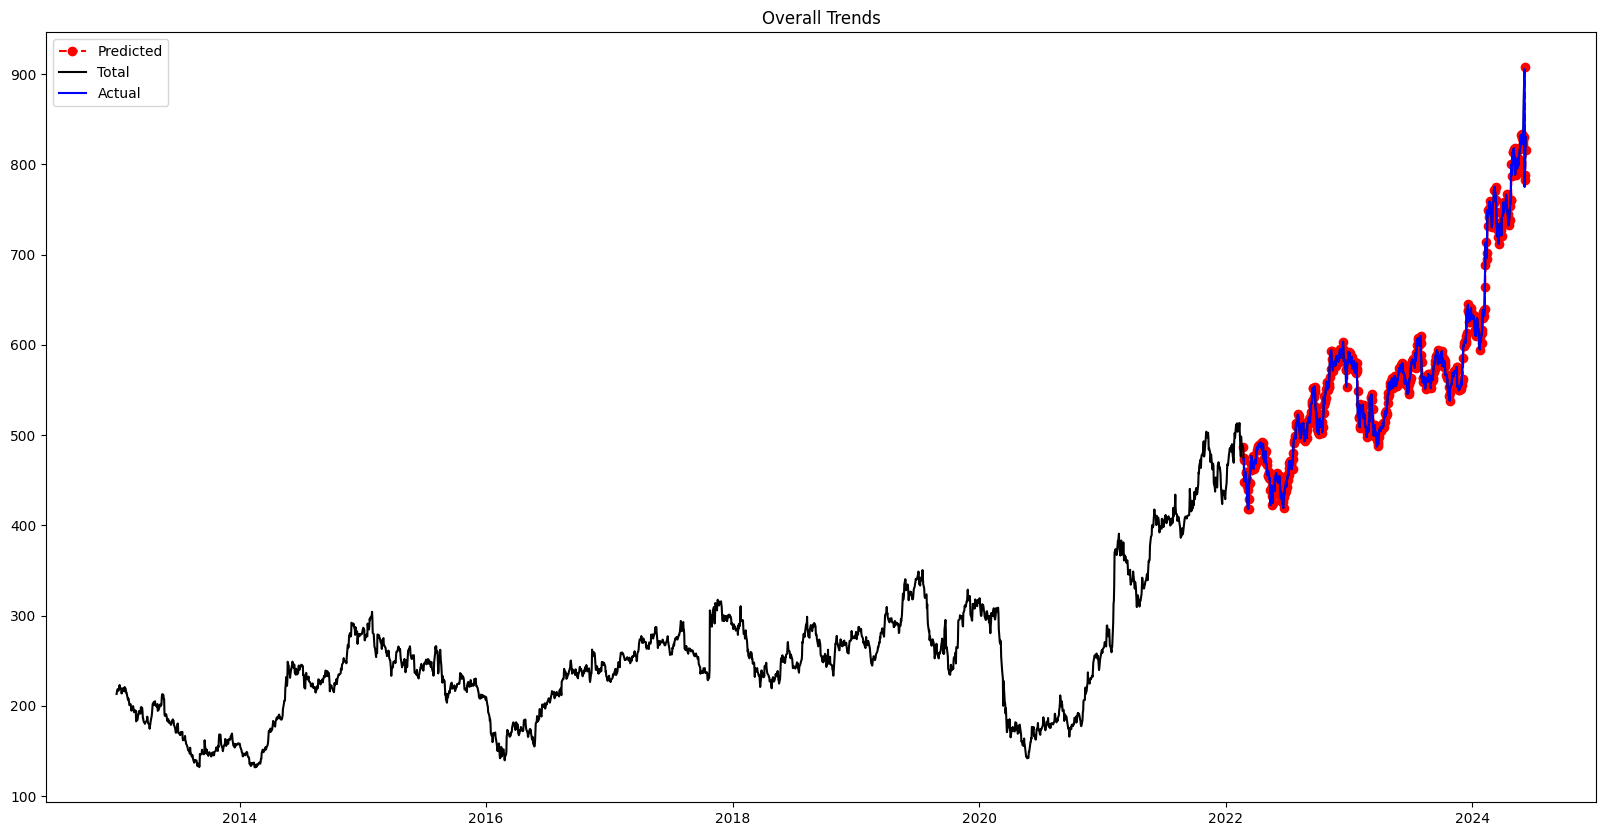

In [29]:
plt.figure(figsize=(20,10))
date_range=np.array(df.index)

date_range_pred=np.array(df[to_row:].index)
plt.plot(date_range_pred,model_predictions[:],color='red',linestyle='dashed',marker='o',label='Predicted')
plt.plot(date_range,np.array(df['Adj Close']),color='black',label='Total')
plt.plot(date_range_pred,testing,color='blue',label='Actual')
plt.legend()
plt.title('Overall Trends')

Text(0.5, 1.0, 'Predictions vs Actual')

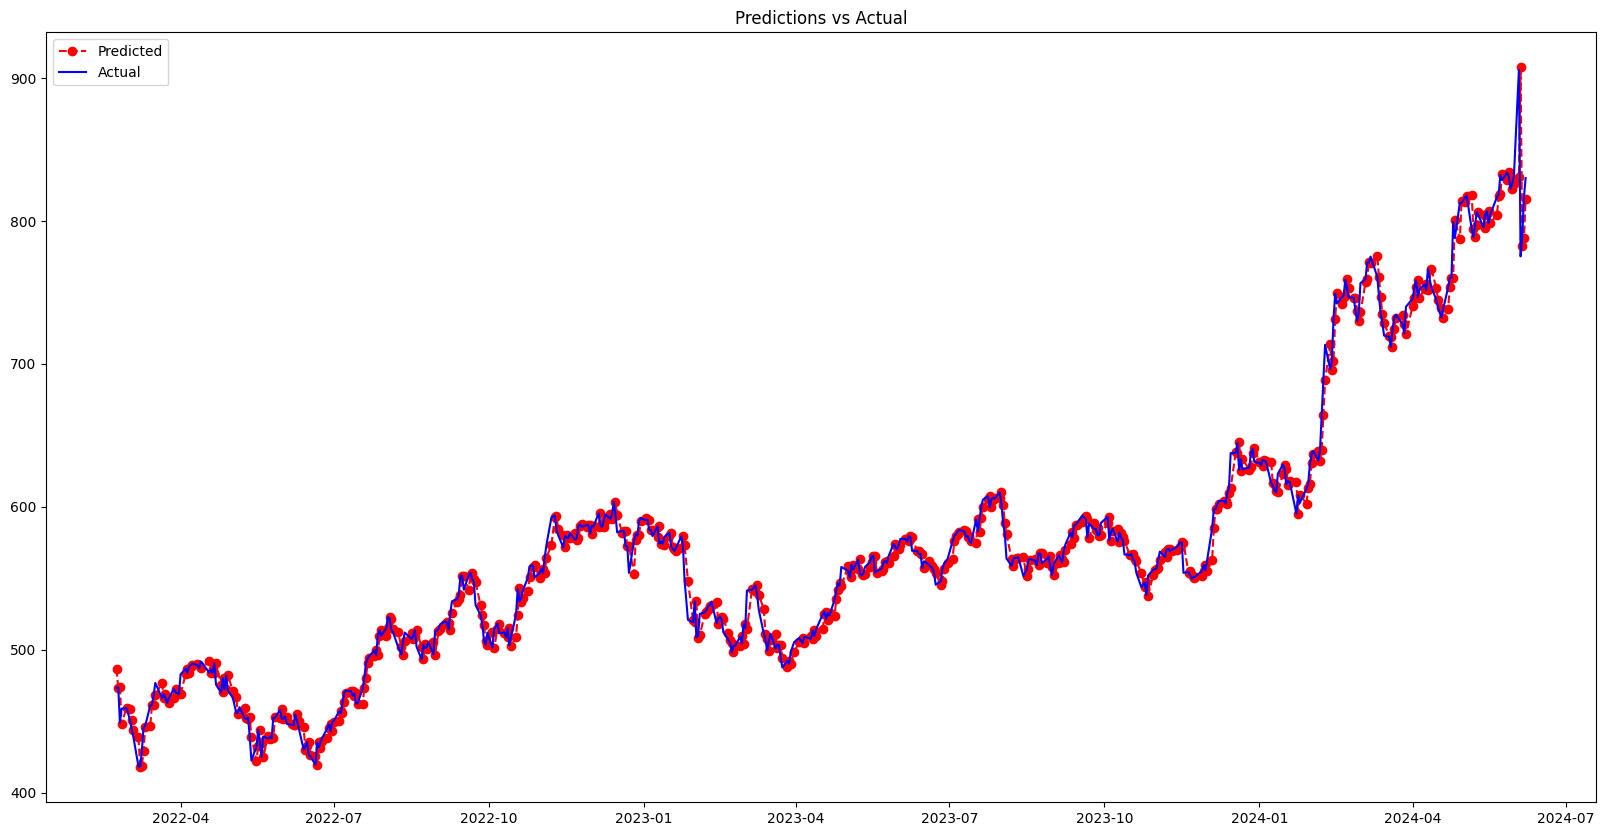

In [31]:
plt.figure(figsize=(20,10))
date_range=np.array(df.index)
plt.plot(date_range_pred,model_predictions[:],color='red',linestyle='dashed',marker='o',label='Predicted')
plt.plot(date_range_pred,testing,color='blue',label='Actual')
plt.legend()
plt.title('Predictions vs Actual')

In [32]:
mape=np.mean(np.abs(np.array(model_predictions)-np.array(testing))/np.abs(testing))

In [33]:
print('MAPE : ', str(mape))



MAPE :  0.17637094788014585


In [34]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(model_predictions,testing))
print(mean_absolute_error(model_predictions,testing))

0.9876271500726886
6.593162202222886
